In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [78]:
df = pd.read_csv('../../Datasets/Lynx_Hare/data.csv', usecols=['YEAR', 'HARE', 'LYNX'])
print(df)

    YEAR   HARE   LYNX
0   1845  19.58  30.09
1   1846  19.60  45.15
2   1847  19.61  49.15
3   1848  11.99  39.52
4   1849  28.04  21.23
..   ...    ...    ...
86  1931  19.52   8.31
87  1932  82.11  16.01
88  1933  89.76  24.82
89  1934  81.66  29.70
90  1935  15.76  35.40

[91 rows x 3 columns]


In [79]:
for col in ['HARE', 'LYNX']:
    df[f'{col}_lag1'] = df[col].shift(1)

df['Lynx_on_Hare'] = df['LYNX_lag1'] * df['HARE']
df.dropna(inplace=True)
print(df)

    YEAR   HARE   LYNX  HARE_lag1  LYNX_lag1  Lynx_on_Hare
1   1846  19.60  45.15      19.58      30.09      589.7640
2   1847  19.61  49.15      19.60      45.15      885.3915
3   1848  11.99  39.52      19.61      49.15      589.3085
4   1849  28.04  21.23      11.99      39.52     1108.1408
5   1850  58.00   8.42      28.04      21.23     1231.3400
..   ...    ...    ...        ...        ...           ...
86  1931  19.52   8.31       4.23       6.98      136.2496
87  1932  82.11  16.01      19.52       8.31      682.3341
88  1933  89.76  24.82      82.11      16.01     1437.0576
89  1934  81.66  29.70      89.76      24.82     2026.8012
90  1935  15.76  35.40      81.66      29.70      468.0720

[90 rows x 6 columns]


In [80]:
X = df.drop(['YEAR', 'HARE', 'LYNX'], axis=1)
y = df[['HARE', 'LYNX']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(y)

    HARE_lag1  LYNX_lag1  Lynx_on_Hare
50      70.40      46.00     3947.2600
63      23.37       6.30      135.7020
74       4.50       6.82       76.4522
70      40.97      43.36     1081.8320
77      69.63       9.94      772.7356
..        ...        ...           ...
21      85.81      60.78     2516.8998
61      57.78      63.51     1821.4668
72      12.59      30.36      150.8892
15      12.64      13.69      294.1981
52      56.69      46.43      770.2737

[72 rows x 3 columns]
     HARE   LYNX
1   19.60  45.15
2   19.61  49.15
3   11.99  39.52
4   28.04  21.23
5   58.00   8.42
..    ...    ...
86  19.52   8.31
87  82.11  16.01
88  89.76  24.82
89  81.66  29.70
90  15.76  35.40

[90 rows x 2 columns]


In [81]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1, warm_start=True, random_state=42)

Epoch 1/200, Training MSE: 1.3343, Test MSE: 2.1035
Epoch 2/200, Training MSE: 1.2974, Test MSE: 2.0407
Epoch 3/200, Training MSE: 1.2613, Test MSE: 1.9792
Epoch 4/200, Training MSE: 1.2262, Test MSE: 1.9191
Epoch 5/200, Training MSE: 1.1918, Test MSE: 1.8606
Epoch 6/200, Training MSE: 1.1581, Test MSE: 1.8033
Epoch 7/200, Training MSE: 1.1253, Test MSE: 1.7473
Epoch 8/200, Training MSE: 1.0933, Test MSE: 1.6931
Epoch 9/200, Training MSE: 1.0621, Test MSE: 1.6402
Epoch 10/200, Training MSE: 1.0317, Test MSE: 1.5884
Epoch 11/200, Training MSE: 1.0020, Test MSE: 1.5374
Epoch 12/200, Training MSE: 0.9730, Test MSE: 1.4880
Epoch 13/200, Training MSE: 0.9447, Test MSE: 1.4400
Epoch 14/200, Training MSE: 0.9171, Test MSE: 1.3930
Epoch 15/200, Training MSE: 0.8903, Test MSE: 1.3469
Epoch 16/200, Training MSE: 0.8643, Test MSE: 1.3022
Epoch 17/200, Training MSE: 0.8390, Test MSE: 1.2587
Epoch 18/200, Training MSE: 0.8146, Test MSE: 1.2165
Epoch 19/200, Training MSE: 0.7909, Test MSE: 1.1754
Ep

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

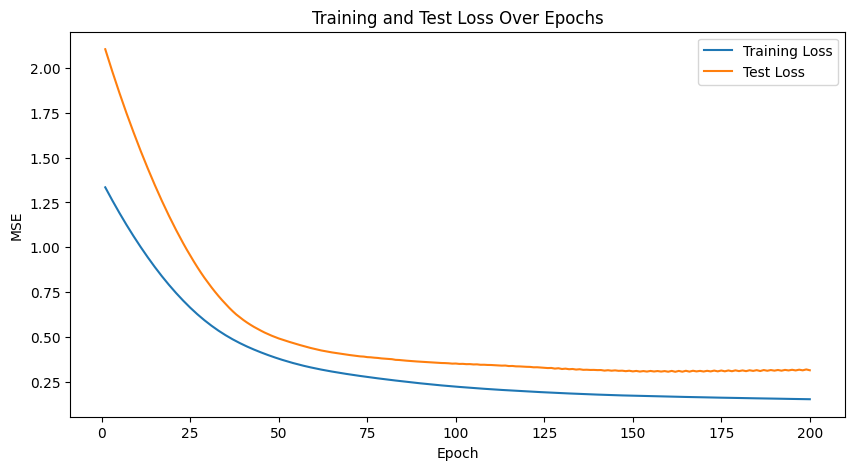

Final Test MSE: 0.3153420943405363


In [82]:
epochs = 200
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.fit(X_train_scaled, y_train_scaled)
    
    # Predict on training and testing set
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate MSE for both training and testing sets
    train_mse = mean_squared_error(y_train_scaled, y_train_pred)
    test_mse = mean_squared_error(y_test_scaled, y_test_pred)
    
    train_losses.append(train_mse)
    test_losses.append(test_mse)
    
    print(f'Epoch {epoch+1}/{epochs}, Training MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')

# Plotting training and testing loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.show()

# Final evaluation
final_mse_test = test_losses[-1]
print(f'Final Test MSE: {final_mse_test}')

In [83]:
df = pd.read_csv('../../Datasets/study_373/top_5_373.csv', usecols=['DATE', '46670', '46982', '46504', '46571', '46888'])
print(df)

           DATE  46670  46982  46504  46571  46888
0    2008-06-08    1.0    2.0    1.0    1.0    2.0
1    2008-07-11    1.0    3.0    1.0    1.0    2.0
2    2008-09-14    2.0    6.0    2.0    1.0    1.0
3    2008-09-16    2.0    1.0    1.0    1.0    3.0
4    2008-09-22    2.0    4.0    1.0    1.0    2.0
..          ...    ...    ...    ...    ...    ...
388  2012-10-18   10.0    6.0    1.0    1.0    2.0
389  2012-10-22    8.0    6.0    1.0    1.0    3.0
390  2012-10-28    3.0    1.0    1.0    1.0    2.0
391  2012-11-08    2.0    7.0    1.0    1.0    2.0
392  2012-11-09    2.0    1.0    1.0    1.0    1.0

[393 rows x 6 columns]


In [84]:
for col in ['46670', '46982', '46504', '46571', '46888']:
    df[f'{col}_lag1'] = df[col].shift(1)

# 46670  Nyctereutes procyonoides	common raccoon dog  -> Rodents, Japanese Hare
# 46982  Sus scrofa				    wild boar           -> Rodents, Japanese Hare
# 46504  Lepus brachyurus			Japanese Hare
# 46571  Meles anakuma			    Japanese Badger     -> Rodents
# 46888  Rodentia	

# 46670 Nyctereutes procyonoides	common raccoon dog  -> Rodents, Japanese Hare
df['46670_on_46888'] = df['46670_lag1'] * df['46888']
df['46670_on_46504'] = df['46670_lag1'] * df['46504']

# 46982 Sus scrofa				    wild boar           -> Rodents, Japanese Hare
df['46982_on_46888'] = df['46982_lag1'] * df['46888']
df['46982_on_46504'] = df['46982_lag1'] * df['46504']

# 46571 Meles anakuma			    Japanese Badger     -> Rodents
df['46571_on_46888'] = df['46571_lag1'] * df['46888']

df.dropna(inplace=True)
print(df)

           DATE  46670  46982  46504  46571  46888  46670_lag1  46982_lag1  \
1    2008-07-11    1.0    3.0    1.0    1.0    2.0         1.0         2.0   
2    2008-09-14    2.0    6.0    2.0    1.0    1.0         1.0         3.0   
3    2008-09-16    2.0    1.0    1.0    1.0    3.0         2.0         6.0   
4    2008-09-22    2.0    4.0    1.0    1.0    2.0         2.0         1.0   
5    2008-09-25    2.0    4.0    1.0    1.0    3.0         2.0         4.0   
..          ...    ...    ...    ...    ...    ...         ...         ...   
388  2012-10-18   10.0    6.0    1.0    1.0    2.0        12.0         9.0   
389  2012-10-22    8.0    6.0    1.0    1.0    3.0        10.0         6.0   
390  2012-10-28    3.0    1.0    1.0    1.0    2.0         8.0         6.0   
391  2012-11-08    2.0    7.0    1.0    1.0    2.0         3.0         1.0   
392  2012-11-09    2.0    1.0    1.0    1.0    1.0         2.0         7.0   

     46504_lag1  46571_lag1  46888_lag1  46670_on_46888  46670_

In [85]:
X = df.drop(['DATE', '46670', '46982', '46504', '46571', '46888'], axis=1)
y = df[['46670', '46982', '46504', '46571', '46888']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)
print(y)

     46670_lag1  46982_lag1  46504_lag1  46571_lag1  46888_lag1  \
259         9.0         2.0         7.0         2.0         1.0   
183         1.0         3.0         6.0        10.0         3.0   
173         2.0         2.0         4.0         2.0         1.0   
64          4.0         1.0        10.0         5.0         1.0   
341         6.0         3.0         2.0         5.0         1.0   
..          ...         ...         ...         ...         ...   
72          1.0         7.0         9.0         1.0         1.0   
107        11.0        10.0         2.0         4.0         7.0   
271         9.0         9.0         4.0         3.0         2.0   
349        12.0         7.0         1.0         2.0         4.0   
103        10.0        13.0         5.0         2.0         1.0   

     46670_on_46888  46670_on_46504  46982_on_46888  46982_on_46504  \
259             9.0             9.0             2.0             2.0   
183             7.0             3.0            21.0  

In [86]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1, warm_start=True, random_state=42)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 1/200, Training MSE: 1.1757, Test MSE: 1.3518
Epoch 2/200, Training MSE: 1.1221, Test MSE: 1.2880
Epoch 3/200, Training MSE: 1.0723, Test MSE: 1.2288
Epoch 4/200, Training MSE: 1.0262, Test MSE: 1.1745
Epoch 5/200, Training MSE: 0.9838, Test MSE: 1.1248
Epoch 6/200, Training MSE: 0.9445, Test MSE: 1.0791
Epoch 7/200, Training MSE: 0.9082, Test MSE: 1.0372
Epoch 8/200, Training MSE: 0.8747, Test MSE: 0.9991
Epoch 9/200, Training MSE: 0.8439, Test MSE: 0.9640
Epoch 10/200, Training MSE: 0.8155, Test MSE: 0.9321
Epoch 11/200, Training MSE: 0.7894, Test MSE: 0.9029
Epoch 12/200, Training MSE: 0.7655, Test MSE: 0.8763
Epoch 13/200, Training MSE: 0.7435, Test MSE: 0.8521
Epoch 14/200, Training MSE: 0.7233, Test MSE: 0.8302
Epoch 15/200, Training MSE: 0.7048, Test MSE: 0.8103
Epoch 16/200, Training MSE: 0.6878, Test MSE: 0.7920
Epoch 17/200, Training MSE: 0.6723, Test MSE: 0.7753
Epoch 18/200, Training MSE: 0.6582, Test MSE: 0.7606
Epoch 19/200, Training MSE: 0.6451, Test MSE: 0.7473
Ep

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 48/200, Training MSE: 0.4819, Test MSE: 0.6067
Epoch 49/200, Training MSE: 0.4793, Test MSE: 0.6058
Epoch 50/200, Training MSE: 0.4767, Test MSE: 0.6042
Epoch 51/200, Training MSE: 0.4743, Test MSE: 0.6034
Epoch 52/200, Training MSE: 0.4719, Test MSE: 0.6021
Epoch 53/200, Training MSE: 0.4697, Test MSE: 0.6014
Epoch 54/200, Training MSE: 0.4675, Test MSE: 0.6002
Epoch 55/200, Training MSE: 0.4655, Test MSE: 0.5998
Epoch 56/200, Training MSE: 0.4635, Test MSE: 0.5987
Epoch 57/200, Training MSE: 0.4614, Test MSE: 0.5978
Epoch 58/200, Training MSE: 0.4596, Test MSE: 0.5968
Epoch 59/200, Training MSE: 0.4576, Test MSE: 0.5965
Epoch 60/200, Training MSE: 0.4558, Test MSE: 0.5956
Epoch 61/200, Training MSE: 0.4540, Test MSE: 0.5951
Epoch 62/200, Training MSE: 0.4523, Test MSE: 0.5941
Epoch 63/200, Training MSE: 0.4506, Test MSE: 0.5943
Epoch 64/200, Training MSE: 0.4490, Test MSE: 0.5930
Epoch 65/200, Training MSE: 0.4475, Test MSE: 0.5930
Epoch 66/200, Training MSE: 0.4459, Test MSE: 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) 

Epoch 149/200, Training MSE: 0.3740, Test MSE: 0.6049
Epoch 150/200, Training MSE: 0.3734, Test MSE: 0.6015
Epoch 151/200, Training MSE: 0.3729, Test MSE: 0.6056
Epoch 152/200, Training MSE: 0.3723, Test MSE: 0.6015
Epoch 153/200, Training MSE: 0.3719, Test MSE: 0.6065
Epoch 154/200, Training MSE: 0.3711, Test MSE: 0.6012
Epoch 155/200, Training MSE: 0.3706, Test MSE: 0.6062
Epoch 156/200, Training MSE: 0.3701, Test MSE: 0.6031
Epoch 157/200, Training MSE: 0.3696, Test MSE: 0.6071
Epoch 158/200, Training MSE: 0.3691, Test MSE: 0.6034
Epoch 159/200, Training MSE: 0.3685, Test MSE: 0.6079
Epoch 160/200, Training MSE: 0.3681, Test MSE: 0.6043
Epoch 161/200, Training MSE: 0.3676, Test MSE: 0.6084
Epoch 162/200, Training MSE: 0.3670, Test MSE: 0.6053
Epoch 163/200, Training MSE: 0.3665, Test MSE: 0.6092
Epoch 164/200, Training MSE: 0.3659, Test MSE: 0.6062
Epoch 165/200, Training MSE: 0.3653, Test MSE: 0.6096
Epoch 166/200, Training MSE: 0.3648, Test MSE: 0.6061
Epoch 167/200, Training MSE:

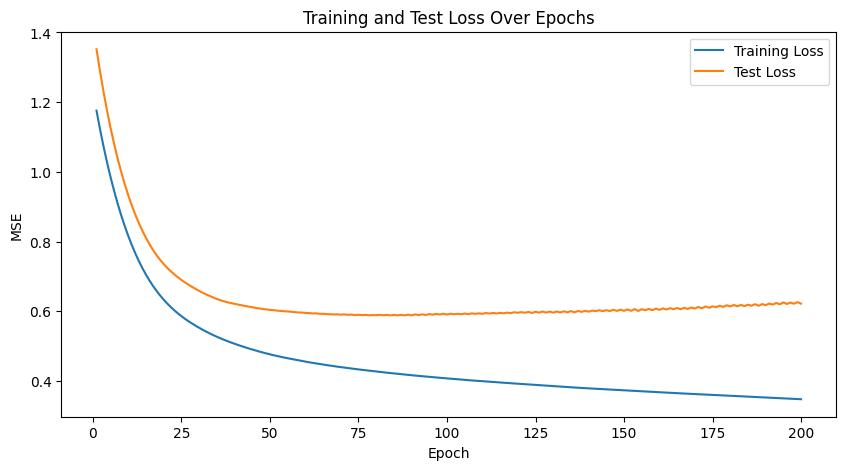

Final Test MSE: 0.6219723098230237


In [87]:
epochs = 200
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.fit(X_train_scaled, y_train_scaled)
    
    # Predict on training and testing set
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate MSE for both training and testing sets
    train_mse = mean_squared_error(y_train_scaled, y_train_pred)
    test_mse = mean_squared_error(y_test_scaled, y_test_pred)
    
    train_losses.append(train_mse)
    test_losses.append(test_mse)
    
    print(f'Epoch {epoch+1}/{epochs}, Training MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}')

# Plotting training and testing loss over epochs
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.show()

# Final evaluation
final_mse_test = test_losses[-1]
print(f'Final Test MSE: {final_mse_test}')